C:\Users\Python\deeplearning.ai_homework\Initialization & Regularization & Gradient Checking\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\Python\deeplearning.ai_homework\Initialization & Regularization & Gradient Checking\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6976782635256605
Cost after iteration 2000: 0.6933079874734088
Cost after iteration 3000: 0.6926359454315135
Cost after iteration 4000: 0.6925309433539801
Cost after iteration 5000: 0.692511218122429
Cost after iteration 6000: 0.6925041994655836
Cost after iteration 7000: 0.6924979775608691
Cost after iteration 8000: 0.6924911849493712
Cost after iteration 9000: 0.692484366794069
Cost after iteration 10000: 0.6924774819405302
Cost after iteration 11000: 0.6924713097367889
Cost after iteration 12000: 0.6924652131338679
Cost after iteration 13000: 0.6924590588634949
Cost after iteration 14000: 0.6924528463348872


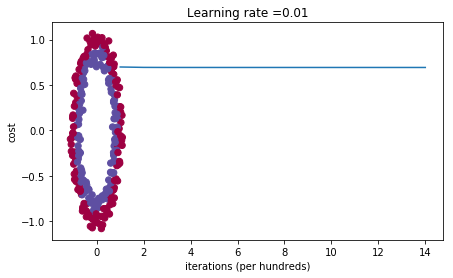

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.51
predictions_train = [[0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1
  1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0
  1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1
  1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
  0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1
  0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1
  1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1
  0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  0 1 1 1 1 0 0 0 1 1 1 0]]
predictions_test = [[1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1
  0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0
  1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1]]


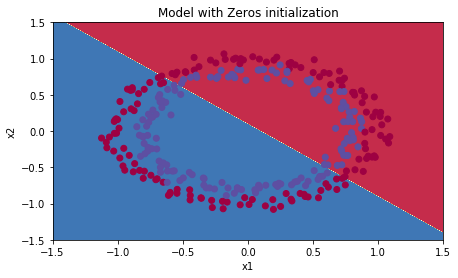

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec


def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.squeeze(), cmap=plt.cm.Spectral)
    plt.show()
    
    

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()


def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters['W'+str(l)] = np.ones((layers_dims[l], layers_dims[l-1]))
        parameters['b'+str(l)] = np.ones((layers_dims[l], 1))
    
    return parameters

    
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]

    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    for i in range(0, num_iterations):
#         print(parameters.values())
        a3, cache = forward_propagation(X, parameters)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters


parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [14]:
np.ones((2,2,3))

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])